In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import signal
from fractions import Fraction 

plt.rcParams["figure.figsize"] = (15,10)

1)
Rolling a seven is more likely since there is only one way to role snake eyes and multiple ways to role 7

P of snakes eye is 1/6 *1/6 = 1/32
for 7
we have (1/36)*6 = 1/6
so the ratio is 
6 - 1
lets use code to show this

In [2]:
#lets start with p of rolling a one followed by a 1
#in independent fair die roles

P_1 = 1/6
P_1_1 = P_1 * P_1
print('The odds of rolling snake eyes is', P_1_1)
# now we find the odds of rolling a seven 
# we know the combination for any companion is 1/36 and we have 7 six combinations that give us a seven so we are left with

print("The odds of rolling a 7 is",P_1_1 *6)
#which is a 1/6 as expected

The odds of rolling snake eyes is 0.027777777777777776
The odds of rolling a 7 is 0.16666666666666666


2)
Lets set up some discreet distribution for die roles. it will just a square distribution with p = 1/6 for x 0 to 6 and zero everywhere else

Lets do it first analytically,
so for two dice we have will list each passible role resulting in a given summed value then multiply the number of ways by 1/36 to get the probability of rolling that value

2 = [1+1], p(2)=1/36

3 = [1+2] [2+1], p(3)=(1/36)*2 = 1/18

4 = [1+3] [2+2] [3+1], p(4)=(1/36)*3 = 1/12

5 = [1+4] [2+3] [3+2] [4+1] ,p(5)=(1/36)*4 = 1/9

6 = [1+5] [2+4] [3+3] [4+2] [5+1] ,p(6)=(1/36)*5 = 5/18

7 = [1+6] [2+5] [3+4] [4+3] [5+2] [6+1], p(7)= (1/36)*6 = 1/6

8 = [2+6] [3+5] [4+4] [5,3] [6+2], p(8)=(1/36)*6 = 5/36

9 = [3+6] [4+5] [5+4] [6+3], p(9)=(1/36)*4 = 1/9

10 = [4+6] [5+5] [6+4] ,p(10)=(1/36)*3 = 1/12

11 = [5+6] [6+5],  p(11)=(1/36)*2 = 1/18

12 = [6+6], p(12)=1/36


In [3]:
dice = [0,1/6,1/6,1/6,1/6,1/6,1/6,0]

# x =list(range(len(dice)))
# fig, ax = plt.subplots(1,1)
# ax.bar(x,dice)
# plt.tick_params(labelsize = 24)
# plt.xlim([0,7])
# #plt.xlabel('X')
# plt.ylabel('Probability')
# plt.xlabel('Die roll value')
# ax.set_title('Die roll probability for a single die')
# plt.show()

And now to do the numeric way and we will plot out the probabilities of rolling each value

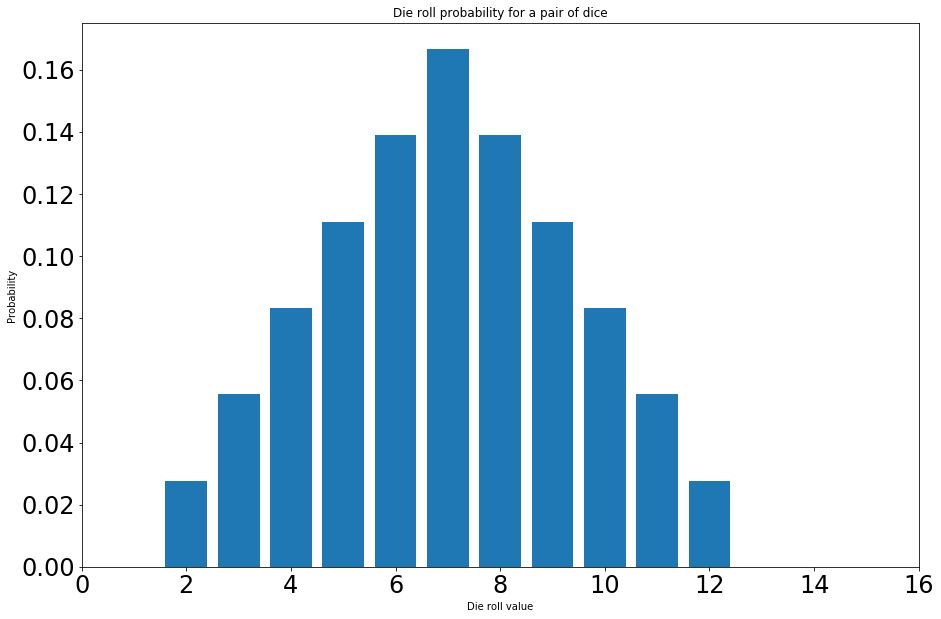

In [4]:
def multiconvolve (x,n):
    Backgound=x
    if n <= 1:
        return (x)
   
    con = signal.convolve(Backgound,Backgound) 
    for i in range(0, n-2):
        con = signal.convolve(con,Backgound)
        #print("did the thing")
        i+=1
    con = np.append(con,[0]*(n-1))  
    return(con)
tworolls = multiconvolve (dice,2)
x =list(range(len(tworolls)))
fig, ax = plt.subplots(1,1)
ax.bar(x,tworolls)
plt.tick_params(labelsize = 24)
plt.xlim([0,len(tworolls)])
#plt.xlabel('X')
plt.ylabel('Probability')
plt.xlabel('Die roll value')
ax.set_title('Die roll probability for a pair of dice')
plt.show()


3)
Lets find the mean then the variance, the mean is straight forward we just take a weighted average of the values weighted by their occurrence and divide by the sum of all occurrences.

and then we can use that to find variance by finding the difference of each value form the mean square then weighing it by the number of occurrences diving by the sum of all occurrences. this code below does that. Note that we are not using a pdf but are using number of ways that a value die rolls can happen.

In [5]:
def averagevalue (dist):
    x = list(range(len(dist)))
    weightedsum = 0
    Sum = 0
    for i in range(0,len(dist)):
             Sum += dist[i]
             
    for i in range(0,len(dist)):
             weightedsum += dist[i]*x[i]
             
     
    average =  weightedsum/Sum
    return(average)


def Var(dist):
    var = 0
    val = list(range(len(dist)))
    x = np.nonzero(dist)
    y = x[0]
    mu = averagevalue (dist)
    for i in y:
        #print(i)
        dist
        var += ( val[i]- mu )*( val[i]- mu )*dist[i]
        
    Sum = 0
    for i in range(0,len(dist)):
             Sum += dist[i]
    
    var = var/Sum
    return (var)
    

In [6]:
waystoroll = [0,1,1,1,1,1,1]
waystorooltwodice = signal.convolve(waystoroll,waystoroll)
print('The avarage value is ' , averagevalue(waystorooltwodice))
print('The varaice is' , Var(waystorooltwodice))

The avarage value is  7.0
The varaice is 5.833333333333333


which is what we expect to find for the role of two dice!

4)
Below is the graph for the average of ten dice rolls plotted on a semi log graph. So no matter what distribution we start out with it will eventually become a Gaussian when averaged or summed with itself enough times, this due to the central limit theorem, for dice we start with a square distribution which approaches Gaussian quite fast. the best way to how close it is to being a Gaussian is to see just how close to a parabola the distribution is when plotted on a semi log scale. below we can see that we are very close with the tails dropping off right at 1 and 6 since we get a p=0 outside of that range as possible rolls for a die. So, no it is not Gaussian distributed but it is practically Gaussian distributed.


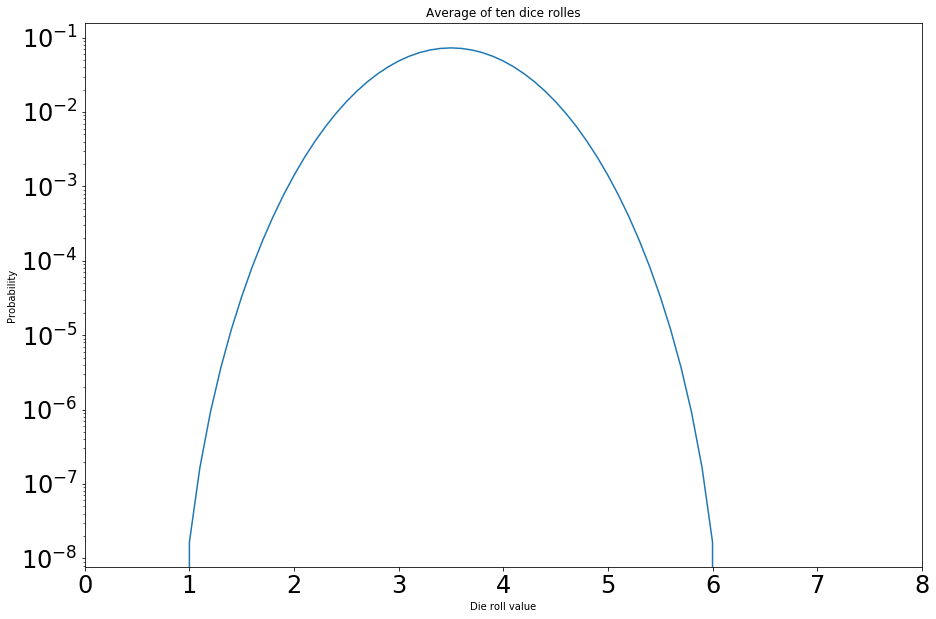

In [53]:
tendice = multiconvolve (dice,10)
axis = np.array(list(range(len(tendice))))
axis=axis/10
fig, ax = plt.subplots(1,1)
ax.plot(axis,tendice)
plt.tick_params(labelsize = 24)
plt.xlim([0,len(tendice)/10])
plt.xlabel('X')
plt.ylabel('Probability')
plt.xlabel('Die roll value')
plt.yscale('log')
ax.set_title('Average of ten dice rolles')
plt.show()

5)
Let us first do a convolution of a Gaussian

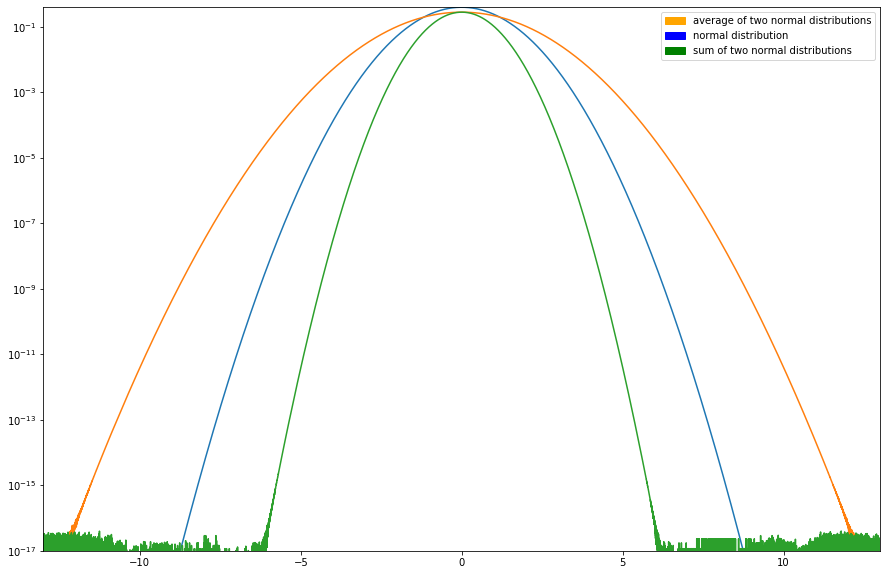

In [63]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

dx = 0.001
y=np.arange(-20,20,dx)
norm = stats.norm.pdf(y,loc =0 , scale = 1)
plt.plot(y,norm)
z=np.arange(-20*2,20*2,(dx))
x=np.arange(-20,20,(dx)/2)
plt.xlim([-13,13])
plt.ylim([0.00000000000000001,0.4])
blue_patch = mpatches.Patch(color='blue', label='normal distribution')
red_patch = mpatches.Patch(color='orange', label='average of two normal distributions')
green_patch = mpatches.Patch(color='green', label='sum of two normal distributions')
plt.legend(handles=[red_patch,blue_patch,green_patch])
test3 = multiconvolve(norm,2)*dx
plt.plot(z,test3,label="test1")
plt.plot(x,test3,label="test1")
plt.yscale('log')
plt.show()

From the graph, we can see that we get really nice parabolas for the Gaussian as well as the average and sum of Gaussians we see some noise from the convolution calculations on the order of e-16 which I believe to be run off error.
The means add when averaging or summing. And for the sigma when summing two Gaussians we have simma_3 = (sigma_1^2 + sigma_2^2)^1/2 and for the average we just scale the sigma by the number of distribution we added so simma_3* N which would make it wider.
The longer we integrate a signal the flatter the graph will become. spreading out the variance of the noise. 